In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import catboost as cb

In [2]:
data1 = pd.read_csv('taiwan_data.csv')

In [3]:
data1.drop(columns=["PAY_5","PAY_6","BILL_AMT2",
       "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"],inplace=True)

In [4]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,3913,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,2682,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,8617,2000,36681,10000,9000,689,679,0


In [5]:
print(data1.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


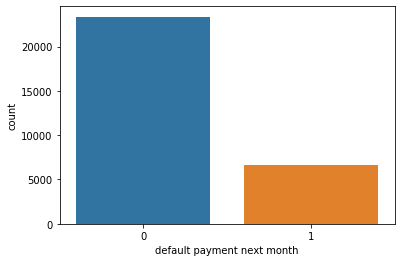

In [6]:
sns.countplot(data1['default payment next month'],label="Count")
plt.show()

#### On remarque un desequilbre entre les classes(Yes(1), No(0))

In [7]:
23364/(23364+6636)

0.7788

#### Diviser les données en données d'apprentissage et données de test 

In [8]:
y = data1.iloc[:,-1]   # Enregistrer la varialbe target
x = data1.iloc[:,0:-1]; # Enleveer la colonne target

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 1)

## MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## StandarScaler

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Classification Algorithms

In [12]:
Models_results=pd.DataFrame()

###  K-Nearest Neighbors

Text(0, 0.5, 'Erreur')

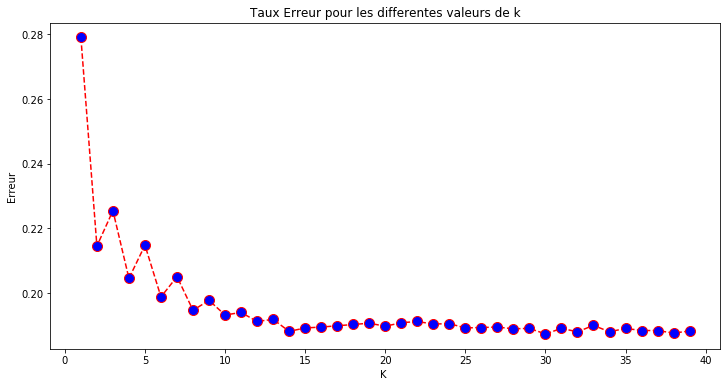

In [13]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [14]:
#Best k is 30

In [15]:
def K_Nearest_Neighbors(Models_results,k):
    knn = KNeighborsClassifier(k)
    knn_model=knn.fit(X_train, y_train)
    y_pred_knn =knn_model.predict(X_test)
    print(knn_model,'\n')
    print(confusion_matrix(y_test, y_pred_knn))
    print(classification_report(y_test,y_pred_knn))
    roc=roc_auc_score(y_test, y_pred_knn)
    acc = accuracy_score(y_test,y_pred_knn)
    prec = precision_score(y_test, y_pred_knn)
    rec = recall_score(y_test,y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    model =  pd.DataFrame([['K Nearest Neighbors', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    return M

In [16]:
Models_results=K_Nearest_Neighbors(Models_results,30)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform') 

[[5527  305]
 [1106  562]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5832
           1       0.65      0.34      0.44      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.64      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy of KNN classifier on training set: 0.83
Accuracy of KNN classifier on test set: 0.81


### CART

In [32]:
def Cart(Models_results):
    dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
    dtc_model=dtc.fit(X_train, y_train)
    y_pred_dtc = dtc_model.predict(X_test)
    print(dtc_model,'\n')
    print(confusion_matrix(y_test, y_pred_dtc))
    print(classification_report(y_test,y_pred_dtc))
    roc=roc_auc_score(y_test, y_pred_dtc)
    acc = accuracy_score(y_test,y_pred_dtc)
    prec = precision_score(y_test, y_pred_dtc)
    rec = recall_score(y_test,y_pred_dtc)
    f1 = f1_score(y_test, y_pred_dtc)
    model =  pd.DataFrame([['Classification and Regression Trees', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of CART classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
    print('Accuracy of CART classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
    return M

In [33]:
Models_results=Cart(Models_results)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

[[4946  886]
 [1074  594]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      5832
           1       0.40      0.36      0.38      1668

    accuracy                           0.74      7500
   macro avg       0.61      0.60      0.61      7500
weighted avg       0.73      0.74      0.73      7500

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.74


### Random Forest

In [19]:
def Random_Forest(Models_results):    
    rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state=0)
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
    print(rfc_model,'\n')
    print(confusion_matrix(y_test, y_pred_rfc))
    print(classification_report(y_test,y_pred_rfc))
    roc=roc_auc_score(y_test,y_pred_rfc)
    acc = accuracy_score(y_test,y_pred_rfc)
    prec = precision_score(y_test, y_pred_rfc)
    rec = recall_score(y_test,y_pred_rfc)
    f1 = f1_score(y_test,y_pred_rfc)
    model =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
    return M

In [20]:
Models_results=Random_Forest(Models_results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) 

[[5610  222]
 [1212  456]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5832
           1       0.67      0.27      0.39      1668

    accuracy                           0.81      7500
   macro avg       0.75      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.81


### Stochastic Gradient descent

In [21]:
def Stochastic_Gradient_Descent(Models_results):    
    sgd = SGDClassifier()
    sgd_model=sgd.fit(X_train, y_train)
    y_pred_stochastic_gradient_descent = sgd_model.predict(X_test)
    print(sgd_model,'\n')
    print(confusion_matrix(y_test,y_pred_stochastic_gradient_descent))
    print(classification_report(y_test,y_pred_stochastic_gradient_descent))
    roc=roc_auc_score(y_test,y_pred_stochastic_gradient_descent)
    acc = accuracy_score(y_test,y_pred_stochastic_gradient_descent)
    prec = precision_score(y_test,y_pred_stochastic_gradient_descent)
    rec = recall_score(y_test,y_pred_stochastic_gradient_descent)
    f1 = f1_score(y_test,y_pred_stochastic_gradient_descent)
    model =  pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Stochastic Gradient Descent classifier on training set: {:.2f}'.format(sgd.score(X_train, y_train)))
    print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))
    return M

In [22]:
Models_results=Stochastic_Gradient_Descent(Models_results)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 

[[5667  165]
 [1273  395]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5832
           1       0.71      0.24      0.35      1668

    accuracy                           0.81      7500
   macro avg       0.76      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Accuracy of Stochastic Gradient Descent classifier on training set: 0.81
Accuracy of Stochastic Gradient Descent classifier on test set: 0.81


### SVM

In [23]:
def Support_Vector_Machine(Models_results):    
    scv = SVC()
    svc_model=scv.fit(X_train, y_train)
    y_pred_svm = svc_model.predict(X_test)
    print(svc_model,'\n')
    print(confusion_matrix(y_test,y_pred_svm))
    print(classification_report(y_test,y_pred_svm))
    roc=roc_auc_score(y_test,y_pred_svm)
    acc = accuracy_score(y_test,y_pred_svm)
    prec = precision_score(y_test,y_pred_svm)
    rec = recall_score(y_test,y_pred_svm)
    f1 = f1_score(y_test,y_pred_svm)
    model =  pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'.format(scv.score(X_train, y_train)))
    print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(scv.score(X_test, y_test)))
    return M

In [24]:
Models_results=Support_Vector_Machine(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 

[[5735   97]
 [1419  249]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5832
           1       0.72      0.15      0.25      1668

    accuracy                           0.80      7500
   macro avg       0.76      0.57      0.57      7500
weighted avg       0.78      0.80      0.74      7500

Accuracy of Support Vector Machine classifier on training set: 0.79
Accuracy of Support Vector Machine classifier on test set: 0.80


#### Catboost

In [25]:
def Catboost(Models_results):    
    catt = cb.CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=0)
    catt_model=catt.fit(X_train, y_train,eval_set=(X_test,y_test))
    y_pred_catt = catt_model.predict(X_test)
    print(catt_model,'\n')
    print(confusion_matrix(y_test,y_pred_catt))
    print(classification_report(y_test,y_pred_catt))
    roc=roc_auc_score(y_test,y_pred_catt)
    acc = accuracy_score(y_test,y_pred_catt)
    prec = precision_score(y_test,y_pred_catt)
    rec = recall_score(y_test,y_pred_catt)
    f1 = f1_score(y_test,y_pred_catt)
    model =  pd.DataFrame([['Catboost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(catt.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catt.score(X_test, y_test)))
    return M

In [26]:
Models_results=Catboost(Models_results)

Learning rate set to 0.108201
0:	learn: 0.8202222	test: 0.8181333	best: 0.8181333 (0)	total: 111ms	remaining: 1m 51s
1:	learn: 0.8205333	test: 0.8188000	best: 0.8188000 (1)	total: 166ms	remaining: 1m 22s
2:	learn: 0.8205778	test: 0.8186667	best: 0.8188000 (1)	total: 227ms	remaining: 1m 15s
3:	learn: 0.8205778	test: 0.8184000	best: 0.8188000 (1)	total: 282ms	remaining: 1m 10s
4:	learn: 0.8203556	test: 0.8188000	best: 0.8188000 (1)	total: 344ms	remaining: 1m 8s
5:	learn: 0.8203111	test: 0.8189333	best: 0.8189333 (5)	total: 398ms	remaining: 1m 5s
6:	learn: 0.8204000	test: 0.8189333	best: 0.8189333 (5)	total: 459ms	remaining: 1m 5s
7:	learn: 0.8204444	test: 0.8189333	best: 0.8189333 (5)	total: 483ms	remaining: 59.9s
8:	learn: 0.8208444	test: 0.8192000	best: 0.8192000 (8)	total: 538ms	remaining: 59.2s
9:	learn: 0.8211111	test: 0.8190667	best: 0.8192000 (8)	total: 595ms	remaining: 58.9s
10:	learn: 0.8211111	test: 0.8189333	best: 0.8192000 (8)	total: 650ms	remaining: 58.4s
11:	learn: 0.822000

96:	learn: 0.8262222	test: 0.8118667	best: 0.8198667 (13)	total: 5.76s	remaining: 53.6s
97:	learn: 0.8262222	test: 0.8108000	best: 0.8198667 (13)	total: 5.82s	remaining: 53.5s
98:	learn: 0.8264444	test: 0.8108000	best: 0.8198667 (13)	total: 5.87s	remaining: 53.4s
99:	learn: 0.8261778	test: 0.8110667	best: 0.8198667 (13)	total: 5.93s	remaining: 53.4s
100:	learn: 0.8262667	test: 0.8093333	best: 0.8198667 (13)	total: 5.99s	remaining: 53.3s
101:	learn: 0.8262222	test: 0.8096000	best: 0.8198667 (13)	total: 6.07s	remaining: 53.4s
102:	learn: 0.8262667	test: 0.8093333	best: 0.8198667 (13)	total: 6.13s	remaining: 53.4s
103:	learn: 0.8263111	test: 0.8086667	best: 0.8198667 (13)	total: 6.19s	remaining: 53.3s
104:	learn: 0.8263556	test: 0.8077333	best: 0.8198667 (13)	total: 6.26s	remaining: 53.4s
105:	learn: 0.8264000	test: 0.8076000	best: 0.8198667 (13)	total: 6.32s	remaining: 53.3s
106:	learn: 0.8264444	test: 0.8074667	best: 0.8198667 (13)	total: 6.37s	remaining: 53.2s
107:	learn: 0.8263111	tes

190:	learn: 0.8293333	test: 0.7928000	best: 0.8198667 (13)	total: 11.1s	remaining: 47.1s
191:	learn: 0.8293778	test: 0.7926667	best: 0.8198667 (13)	total: 11.2s	remaining: 47.1s
192:	learn: 0.8295556	test: 0.7925333	best: 0.8198667 (13)	total: 11.2s	remaining: 47s
193:	learn: 0.8294667	test: 0.7928000	best: 0.8198667 (13)	total: 11.3s	remaining: 47s
194:	learn: 0.8296889	test: 0.7930667	best: 0.8198667 (13)	total: 11.4s	remaining: 46.9s
195:	learn: 0.8296889	test: 0.7930667	best: 0.8198667 (13)	total: 11.4s	remaining: 46.9s
196:	learn: 0.8296444	test: 0.7934667	best: 0.8198667 (13)	total: 11.5s	remaining: 46.9s
197:	learn: 0.8297778	test: 0.7937333	best: 0.8198667 (13)	total: 11.6s	remaining: 46.8s
198:	learn: 0.8298222	test: 0.7936000	best: 0.8198667 (13)	total: 11.6s	remaining: 46.8s
199:	learn: 0.8296444	test: 0.7936000	best: 0.8198667 (13)	total: 11.7s	remaining: 46.8s
200:	learn: 0.8296000	test: 0.7934667	best: 0.8198667 (13)	total: 11.8s	remaining: 46.7s
201:	learn: 0.8295556	tes

285:	learn: 0.8325333	test: 0.7862667	best: 0.8198667 (13)	total: 16.8s	remaining: 41.8s
286:	learn: 0.8324889	test: 0.7862667	best: 0.8198667 (13)	total: 16.8s	remaining: 41.8s
287:	learn: 0.8324889	test: 0.7857333	best: 0.8198667 (13)	total: 16.9s	remaining: 41.7s
288:	learn: 0.8325333	test: 0.7857333	best: 0.8198667 (13)	total: 16.9s	remaining: 41.6s
289:	learn: 0.8325778	test: 0.7858667	best: 0.8198667 (13)	total: 17s	remaining: 41.5s
290:	learn: 0.8328000	test: 0.7858667	best: 0.8198667 (13)	total: 17s	remaining: 41.5s
291:	learn: 0.8328889	test: 0.7858667	best: 0.8198667 (13)	total: 17.1s	remaining: 41.4s
292:	learn: 0.8330222	test: 0.7860000	best: 0.8198667 (13)	total: 17.1s	remaining: 41.3s
293:	learn: 0.8330222	test: 0.7860000	best: 0.8198667 (13)	total: 17.1s	remaining: 41.2s
294:	learn: 0.8329333	test: 0.7860000	best: 0.8198667 (13)	total: 17.2s	remaining: 41.1s
295:	learn: 0.8329778	test: 0.7858667	best: 0.8198667 (13)	total: 17.3s	remaining: 41.1s
296:	learn: 0.8330667	tes

380:	learn: 0.8349778	test: 0.7864000	best: 0.8198667 (13)	total: 21.9s	remaining: 35.5s
381:	learn: 0.8349778	test: 0.7864000	best: 0.8198667 (13)	total: 21.9s	remaining: 35.4s
382:	learn: 0.8350222	test: 0.7864000	best: 0.8198667 (13)	total: 21.9s	remaining: 35.4s
383:	learn: 0.8350222	test: 0.7864000	best: 0.8198667 (13)	total: 22s	remaining: 35.3s
384:	learn: 0.8351111	test: 0.7864000	best: 0.8198667 (13)	total: 22.1s	remaining: 35.3s
385:	learn: 0.8350667	test: 0.7864000	best: 0.8198667 (13)	total: 22.2s	remaining: 35.3s
386:	learn: 0.8350667	test: 0.7864000	best: 0.8198667 (13)	total: 22.2s	remaining: 35.2s
387:	learn: 0.8350667	test: 0.7864000	best: 0.8198667 (13)	total: 22.3s	remaining: 35.2s
388:	learn: 0.8351556	test: 0.7865333	best: 0.8198667 (13)	total: 22.3s	remaining: 35.1s
389:	learn: 0.8351556	test: 0.7865333	best: 0.8198667 (13)	total: 22.4s	remaining: 35s
390:	learn: 0.8353778	test: 0.7862667	best: 0.8198667 (13)	total: 22.4s	remaining: 35s
391:	learn: 0.8354667	test:

476:	learn: 0.8363556	test: 0.7864000	best: 0.8198667 (13)	total: 26.9s	remaining: 29.5s
477:	learn: 0.8364889	test: 0.7864000	best: 0.8198667 (13)	total: 27s	remaining: 29.5s
478:	learn: 0.8368444	test: 0.7862667	best: 0.8198667 (13)	total: 27s	remaining: 29.4s
479:	learn: 0.8369333	test: 0.7864000	best: 0.8198667 (13)	total: 27.1s	remaining: 29.4s
480:	learn: 0.8369778	test: 0.7862667	best: 0.8198667 (13)	total: 27.2s	remaining: 29.3s
481:	learn: 0.8369778	test: 0.7864000	best: 0.8198667 (13)	total: 27.2s	remaining: 29.2s
482:	learn: 0.8368889	test: 0.7864000	best: 0.8198667 (13)	total: 27.3s	remaining: 29.2s
483:	learn: 0.8369333	test: 0.7864000	best: 0.8198667 (13)	total: 27.3s	remaining: 29.1s
484:	learn: 0.8371556	test: 0.7861333	best: 0.8198667 (13)	total: 27.4s	remaining: 29.1s
485:	learn: 0.8371556	test: 0.7861333	best: 0.8198667 (13)	total: 27.4s	remaining: 29s
486:	learn: 0.8371111	test: 0.7862667	best: 0.8198667 (13)	total: 27.5s	remaining: 28.9s
487:	learn: 0.8371111	test:

569:	learn: 0.8382667	test: 0.7862667	best: 0.8198667 (13)	total: 32s	remaining: 24.1s
570:	learn: 0.8382667	test: 0.7862667	best: 0.8198667 (13)	total: 32s	remaining: 24.1s
571:	learn: 0.8382667	test: 0.7862667	best: 0.8198667 (13)	total: 32.1s	remaining: 24s
572:	learn: 0.8382667	test: 0.7862667	best: 0.8198667 (13)	total: 32.1s	remaining: 24s
573:	learn: 0.8382667	test: 0.7862667	best: 0.8198667 (13)	total: 32.2s	remaining: 23.9s
574:	learn: 0.8382667	test: 0.7862667	best: 0.8198667 (13)	total: 32.3s	remaining: 23.8s
575:	learn: 0.8382667	test: 0.7862667	best: 0.8198667 (13)	total: 32.3s	remaining: 23.8s
576:	learn: 0.8383111	test: 0.7861333	best: 0.8198667 (13)	total: 32.3s	remaining: 23.7s
577:	learn: 0.8383111	test: 0.7861333	best: 0.8198667 (13)	total: 32.4s	remaining: 23.6s
578:	learn: 0.8383111	test: 0.7861333	best: 0.8198667 (13)	total: 32.4s	remaining: 23.6s
579:	learn: 0.8383111	test: 0.7862667	best: 0.8198667 (13)	total: 32.5s	remaining: 23.5s
580:	learn: 0.8382667	test: 0

662:	learn: 0.8392000	test: 0.7854667	best: 0.8198667 (13)	total: 37s	remaining: 18.8s
663:	learn: 0.8392000	test: 0.7854667	best: 0.8198667 (13)	total: 37.1s	remaining: 18.8s
664:	learn: 0.8392444	test: 0.7854667	best: 0.8198667 (13)	total: 37.1s	remaining: 18.7s
665:	learn: 0.8393778	test: 0.7854667	best: 0.8198667 (13)	total: 37.2s	remaining: 18.6s
666:	learn: 0.8393333	test: 0.7854667	best: 0.8198667 (13)	total: 37.2s	remaining: 18.6s
667:	learn: 0.8393778	test: 0.7854667	best: 0.8198667 (13)	total: 37.3s	remaining: 18.5s
668:	learn: 0.8393333	test: 0.7853333	best: 0.8198667 (13)	total: 37.3s	remaining: 18.5s
669:	learn: 0.8392889	test: 0.7853333	best: 0.8198667 (13)	total: 37.4s	remaining: 18.4s
670:	learn: 0.8392889	test: 0.7853333	best: 0.8198667 (13)	total: 37.4s	remaining: 18.3s
671:	learn: 0.8393333	test: 0.7850667	best: 0.8198667 (13)	total: 37.5s	remaining: 18.3s
672:	learn: 0.8394222	test: 0.7850667	best: 0.8198667 (13)	total: 37.5s	remaining: 18.2s
673:	learn: 0.8394222	t

756:	learn: 0.8399111	test: 0.7856000	best: 0.8198667 (13)	total: 41.9s	remaining: 13.5s
757:	learn: 0.8399111	test: 0.7856000	best: 0.8198667 (13)	total: 42s	remaining: 13.4s
758:	learn: 0.8399111	test: 0.7856000	best: 0.8198667 (13)	total: 42s	remaining: 13.3s
759:	learn: 0.8399111	test: 0.7856000	best: 0.8198667 (13)	total: 42.1s	remaining: 13.3s
760:	learn: 0.8399556	test: 0.7844000	best: 0.8198667 (13)	total: 42.1s	remaining: 13.2s
761:	learn: 0.8399556	test: 0.7844000	best: 0.8198667 (13)	total: 42.2s	remaining: 13.2s
762:	learn: 0.8399556	test: 0.7844000	best: 0.8198667 (13)	total: 42.2s	remaining: 13.1s
763:	learn: 0.8399556	test: 0.7845333	best: 0.8198667 (13)	total: 42.3s	remaining: 13.1s
764:	learn: 0.8399556	test: 0.7845333	best: 0.8198667 (13)	total: 42.3s	remaining: 13s
765:	learn: 0.8400889	test: 0.7845333	best: 0.8198667 (13)	total: 42.4s	remaining: 12.9s
766:	learn: 0.8400889	test: 0.7845333	best: 0.8198667 (13)	total: 42.4s	remaining: 12.9s
767:	learn: 0.8401333	test:

852:	learn: 0.8405333	test: 0.7850667	best: 0.8198667 (13)	total: 46.8s	remaining: 8.06s
853:	learn: 0.8405333	test: 0.7850667	best: 0.8198667 (13)	total: 46.8s	remaining: 8.01s
854:	learn: 0.8406667	test: 0.7856000	best: 0.8198667 (13)	total: 46.9s	remaining: 7.95s
855:	learn: 0.8406667	test: 0.7856000	best: 0.8198667 (13)	total: 46.9s	remaining: 7.89s
856:	learn: 0.8407111	test: 0.7856000	best: 0.8198667 (13)	total: 47s	remaining: 7.84s
857:	learn: 0.8407111	test: 0.7856000	best: 0.8198667 (13)	total: 47s	remaining: 7.78s
858:	learn: 0.8406222	test: 0.7854667	best: 0.8198667 (13)	total: 47.1s	remaining: 7.73s
859:	learn: 0.8406222	test: 0.7856000	best: 0.8198667 (13)	total: 47.1s	remaining: 7.67s
860:	learn: 0.8406222	test: 0.7856000	best: 0.8198667 (13)	total: 47.2s	remaining: 7.62s
861:	learn: 0.8406222	test: 0.7856000	best: 0.8198667 (13)	total: 47.2s	remaining: 7.56s
862:	learn: 0.8405778	test: 0.7856000	best: 0.8198667 (13)	total: 47.3s	remaining: 7.5s
863:	learn: 0.8405333	test

946:	learn: 0.8408444	test: 0.7853333	best: 0.8198667 (13)	total: 51.3s	remaining: 2.87s
947:	learn: 0.8408444	test: 0.7853333	best: 0.8198667 (13)	total: 51.3s	remaining: 2.82s
948:	learn: 0.8408444	test: 0.7853333	best: 0.8198667 (13)	total: 51.4s	remaining: 2.76s
949:	learn: 0.8409778	test: 0.7852000	best: 0.8198667 (13)	total: 51.4s	remaining: 2.71s
950:	learn: 0.8408889	test: 0.7852000	best: 0.8198667 (13)	total: 51.5s	remaining: 2.65s
951:	learn: 0.8409778	test: 0.7852000	best: 0.8198667 (13)	total: 51.6s	remaining: 2.6s
952:	learn: 0.8409333	test: 0.7852000	best: 0.8198667 (13)	total: 51.6s	remaining: 2.54s
953:	learn: 0.8409333	test: 0.7852000	best: 0.8198667 (13)	total: 51.7s	remaining: 2.49s
954:	learn: 0.8409778	test: 0.7852000	best: 0.8198667 (13)	total: 51.8s	remaining: 2.44s
955:	learn: 0.8410222	test: 0.7852000	best: 0.8198667 (13)	total: 51.8s	remaining: 2.38s
956:	learn: 0.8410222	test: 0.7852000	best: 0.8198667 (13)	total: 51.9s	remaining: 2.33s
957:	learn: 0.8409778	

#### Logistic Regression

In [27]:
def Logistic_Regression(Models_results):
    log = LogisticRegression()
    log_model= log.fit(X_train,y_train)
    print(log_model,'\n')
    y_pred_log_reg = log_model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_log_reg))
    print(classification_report(y_test,y_pred_log_reg))
    roc=roc_auc_score(y_test, y_pred_log_reg)
    acc = accuracy_score(y_test,y_pred_log_reg)
    prec = precision_score(y_test, y_pred_log_reg)
    rec = recall_score(y_test, y_pred_log_reg)
    f1 = f1_score(y_test, y_pred_log_reg)
    model =  pd.DataFrame([['Logistic_Regression', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
    return M

In [28]:
Models_results=Logistic_Regression(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

[[5533  299]
 [1081  587]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.66      0.35      0.46      1668

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

Accuracy of Catboost classifier on training set: 0.81
Accuracy of Catboost classifier on test set: 0.82


## Best algorithms

In [34]:
Models_results.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
5,Catboost,0.819867,0.708827,0.322542,0.443346,0.642324
6,Logistic_Regression,0.816000,0.662528,0.351918,0.459671,0.650325
0,K Nearest Neighbors,0.811867,0.648212,0.336930,0.443393,0.642316
2,Random Forest,0.808800,0.672566,0.273381,0.388747,0.617658
3,Stochastic Gradient Descent,0.808267,0.705357,0.236811,0.354578,0.604259
4,Support Vector Machine,0.797867,0.719653,0.149281,0.247269,0.566324
1,Classification and Regression Trees,0.738667,0.401351,0.356115,0.377382,0.602097
8,Classification and Regression Trees,0.738667,0.401351,0.356115,0.377382,0.602097
7,Classification and Regression Trees,0.665467,0.289645,0.347122,0.315789,0.551819
